<a href="https://colab.research.google.com/github/Hanifanta/Capstone_RECCOFFEE/blob/main/notebook/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis**

##**Import Library**

In [ ]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip (22.0 MB)


In [ ]:
# Data loading and data analysis
import pandas as pd
from pandas_profiling import ProfileReport

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

##**Dataset Information**

In [ ]:
data = pd.read_csv('coffee_fix.csv')
data.head(5)

,slug,all_text,rating,roaster,name,location,origin,roast,est_price,review_date,agtron,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
0,https://www.coffeereview.com/review/sweety-esp...,\n\n\n95\n\n\nA.R.C.\n“Sweety” Espresso Blend...,95,A.R.C.,“Sweety” Espresso Blend,"Hong Kong, China",Panama; Ethiopia,Medium-Light,HKD $250/227 grams,November 2017,50/73,9.0,NaN,9.0,9.0,9.0,9.0,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,https://www.coffeereview.com/review/flora-blen...,\n\n\n94\n\n\nA.R.C.\nFlora Blend Espresso\n\...,94,A.R.C.,Flora Blend Espresso,"Hong Kong, China",Africa; Asia Pacific,Medium-Light,HKD $158/227 grams,November 2017,54/77,9.0,NaN,9.0,9.0,8.0,9.0,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,https://www.coffeereview.com/review/ethiopia-s...,\n\n\n92\n\n\nRevel Coffee\nEthiopia Shakiso ...,92,Revel Coffee,Ethiopia Shakiso Mormora,"Billings, Montana","Guji Zone, southern Ethiopia",Medium-Light,$16.00/12 ounces,November 2017,54/70,9.0,8.0,8.0,9.0,8.0,NaN,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,https://www.coffeereview.com/review/ethiopia-s...,\n\n\n92\n\n\nRoast House\nEthiopia Suke Quto...,92,Roast House,Ethiopia Suke Quto,"Spokane, Washington","Guji Zone, Oromia Region, south-central Ethiopia",Medium-Light,$19.00/16 ounces,November 2017,53/79,8.0,8.0,9.0,9.0,8.0,NaN,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,https://www.coffeereview.com/review/ethiopia-g...,\n\n\n94\n\n\nBig Creek Coffee Roasters\nEthi...,94,Big Creek Coffee Roasters,Ethiopia Gedeb Halo Beriti,"Hamilton, Montana","Gedeb District, Gedeo Zone, southern Ethiopia",Medium,$16.50/12 ounces,November 2017,48/70,9.0,9.0,9.0,9.0,8.0,NaN,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


In [ ]:
print(f'Data consist of {data.shape[1]} columns')
print(f'Each column consists of {data.shape[0]} records')

Data consist of 20 columns
Each column consists of 2282 records


In [ ]:
column_headers = list(data.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['slug', 'all_text', 'rating', 'roaster', 'name', 'location', 'origin', 'roast', 'est_price', 'review_date', 'agtron', 'aroma', 'acid', 'body', 'flavor', 'aftertaste', 'with_milk', 'desc_1', 'desc_2', 'desc_3']


##**Choose The Column to Use**

**The variables that we will use in this project:**

* name : Coffee name
* origin : Coffee origin
* rating : Coffee rating (0-100)
* roaster : Coffee roasting company
* aroma : Coffee aroma
* acid : Coffee acidity
* body : Coffee body size
* flavor : Coffee flavor
* aftertaste : Coffee aftertaste
* desc_1 : Description coffee by Blind Assessment
* desc_2 : Description coffee by Notes
* desc_3 : Description coffee by The Bottom Line


In [ ]:
coffee = data.filter(['name', 'origin', 'rating', 'roaster', 'aroma', 'acid', 'body', 'flavor', 'aftertaste', 'desc_1', 'desc_2', 'desc_3'])
coffee.head(5)

,name,origin,rating,roaster,aroma,acid,body,flavor,aftertaste,desc_1,desc_2,desc_3
0,“Sweety” Espresso Blend,Panama; Ethiopia,95,A.R.C.,9.0,NaN,9.0,9.0,9.0,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,Flora Blend Espresso,Africa; Asia Pacific,94,A.R.C.,9.0,NaN,9.0,9.0,8.0,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,Ethiopia Shakiso Mormora,"Guji Zone, southern Ethiopia",92,Revel Coffee,9.0,8.0,8.0,9.0,8.0,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,Ethiopia Suke Quto,"Guji Zone, Oromia Region, south-central Ethiopia",92,Roast House,8.0,8.0,9.0,9.0,8.0,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,Ethiopia Gedeb Halo Beriti,"Gedeb District, Gedeo Zone, southern Ethiopia",94,Big Creek Coffee Roasters,9.0,9.0,9.0,9.0,8.0,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


##**Handling Missing Value**

In [ ]:
coffee.isnull().sum()

name            0
origin          0
rating          0
roaster         0
aroma          27
acid          335
body            3
flavor          3
aftertaste      3
desc_1          0
desc_2          0
desc_3          2
dtype: int64

Since there are quite a lot of null data in the important columns, we will assign a value of 0 to each of those null columns. We do this because if we remove all null data then we will lose quite a lot of data, and we don't want this.

In [ ]:
values = {'aroma': 0.0, 'acid': 0.0, 'body': 0.0, 'flavor': 0.0, 'aftertaste': 0.0, 'desc_3': 'nothing'}
coffee.fillna(values, inplace=True)

In [ ]:
print('The number of null data is ', coffee.isnull().sum().sum(), ' records')

The number of null data is  0  records


##**Analyze data for each column**

In [ ]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        2282 non-null   object 
 1   origin      2282 non-null   object 
 2   rating      2282 non-null   int64  
 3   roaster     2282 non-null   object 
 4   aroma       2282 non-null   float64
 5   acid        2282 non-null   float64
 6   body        2282 non-null   float64
 7   flavor      2282 non-null   float64
 8   aftertaste  2282 non-null   float64
 9   desc_1      2282 non-null   object 
 10  desc_2      2282 non-null   object 
 11  desc_3      2282 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 214.1+ KB


###**Rating column**

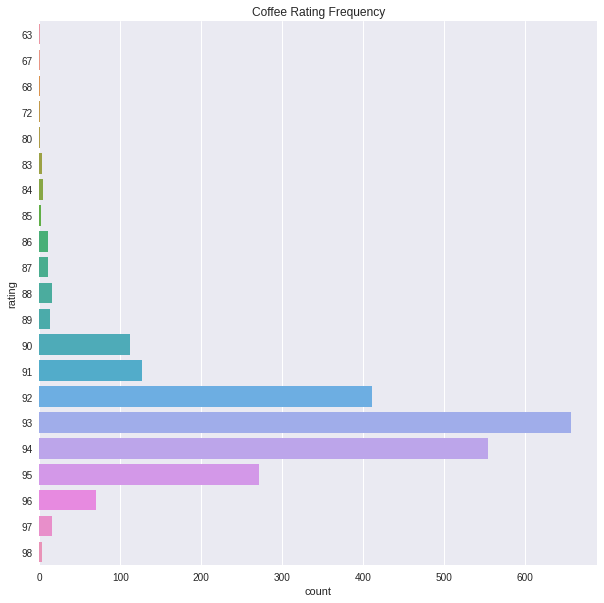

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=coffee['rating'])
plt.title("Coffee Rating Frequency")
plt.show()

In [ ]:
print('Count each value of rating')
coffee['rating'].value_counts()

Count each value of rating


93    657
94    554
92    411
95    271
91    127
90    112
96     70
88     15
97     15
89     13
87     10
86     10
84      4
83      3
98      3
85      2
67      1
72      1
68      1
63      1
80      1
Name: rating, dtype: int64

In [ ]:
coffee['rating'].describe()

count    2282.000000
mean       92.967572
std         2.041181
min        63.000000
25%        92.000000
50%        93.000000
75%        94.000000
max        98.000000
Name: rating, dtype: float64

From the visualization and analysis above, we can see that the majority of our coffee data has a good rating

###**Roaster column**

In [ ]:
count_roaster = coffee.roaster.unique().size
print('There are ', count_roaster, ' different roasters in our dataset')

There are  481  different roasters in our dataset


###**Aroma, acid, and body column**

In [ ]:
coffee[['aroma', 'acid', 'body', 'flavor', 'aftertaste']].describe()

,aroma,acid,body,flavor,aftertaste
count,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000
mean,8.709465,7.239264,8.580193,8.927257,8.079316
std,1.072222,3.060930,0.615390,0.553148,0.627670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,8.000000,8.000000,9.000000,8.000000
50%,9.000000,8.000000,9.000000,9.000000,8.000000
75%,9.000000,9.000000,9.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


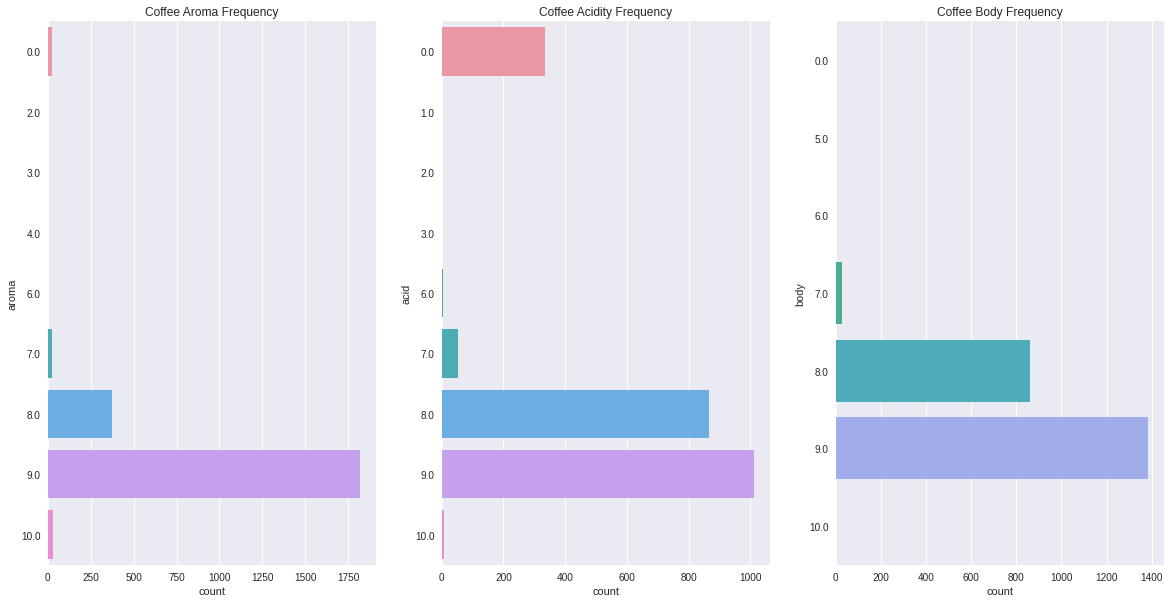

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))
sns.countplot(y=coffee['aroma'], ax=ax[0])
ax[0].set_title('Coffee Aroma Frequency')
sns.countplot(y=coffee['acid'], ax=ax[1])
ax[1].set_title('Coffee Acidity Frequency')
sns.countplot(y=coffee['body'], ax=ax[2])
ax[2].set_title('Coffee Body Frequency')
fig.show()

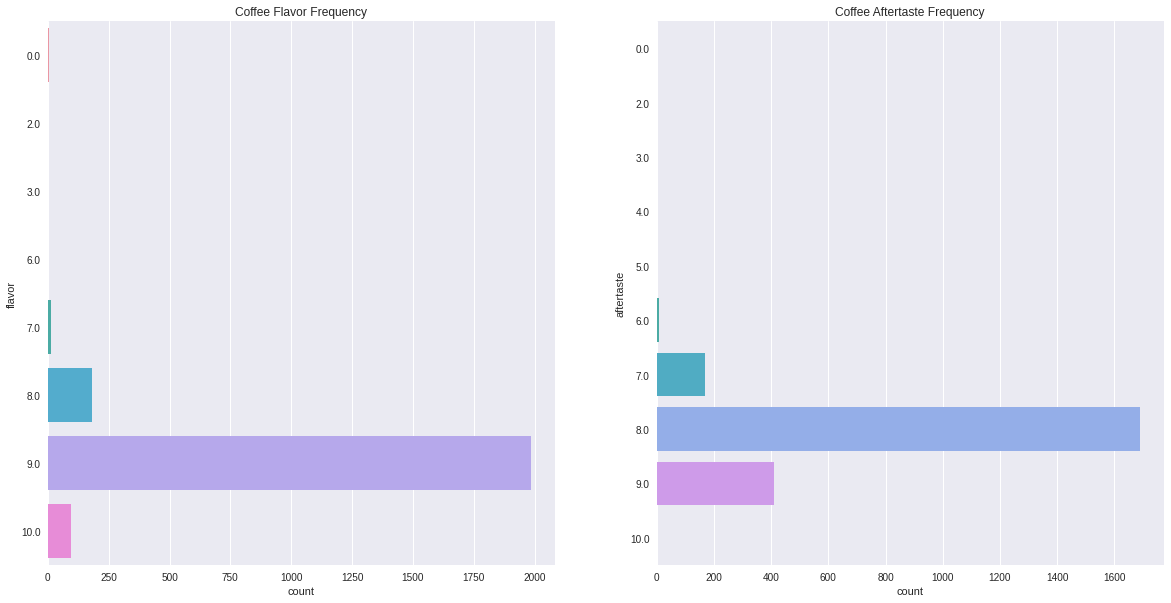

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.countplot(y=coffee['flavor'], ax=ax[0])
ax[0].set_title('Coffee Flavor Frequency')
sns.countplot(y=coffee['aftertaste'], ax=ax[1])
ax[1].set_title('Coffee Aftertaste Frequency')
fig.show()

In [ ]:
print('Count each value of aroma')
coffee['aroma'].value_counts()

Count each value of aroma


9.0     1822
8.0      376
10.0      28
0.0       27
7.0       24
6.0        2
4.0        1
3.0        1
2.0        1
Name: aroma, dtype: int64

In [ ]:
print('Count each value of acid')
coffee['acid'].value_counts()

Count each value of acid


9.0     1013
8.0      865
0.0      335
7.0       52
10.0       8
6.0        5
3.0        2
2.0        1
1.0        1
Name: acid, dtype: int64

In [ ]:
print('Count each value of body')
coffee['body'].value_counts()

Count each value of body


9.0     1384
8.0      862
7.0       27
6.0        4
0.0        3
5.0        1
10.0       1
Name: body, dtype: int64

In [ ]:
print('Count each value of flavor')
coffee['flavor'].value_counts()

Count each value of flavor


9.0     1985
8.0      182
10.0      94
7.0       13
0.0        3
3.0        2
6.0        2
2.0        1
Name: flavor, dtype: int64

In [ ]:
print('Count each value of aftertaste')
coffee['aftertaste'].value_counts()

Count each value of aftertaste


8.0     1688
9.0      409
7.0      169
6.0        7
0.0        3
3.0        2
2.0        1
4.0        1
5.0        1
10.0       1
Name: aftertaste, dtype: int64

##**Pandas Profiling**

In [ ]:
columns = ['name', 'origin', 'rating', 'roaster', 'aroma', 'acid', 'body', 'flavor', 'aftertaste', 'desc_1', 'desc_2', 'desc_3']
coffee_clean = coffee[columns]
coffee_clean.head(5)

,name,origin,rating,roaster,aroma,acid,body,flavor,aftertaste,desc_1,desc_2,desc_3
0,“Sweety” Espresso Blend,Panama; Ethiopia,95,A.R.C.,9.0,0.0,9.0,9.0,9.0,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,Flora Blend Espresso,Africa; Asia Pacific,94,A.R.C.,9.0,0.0,9.0,9.0,8.0,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,Ethiopia Shakiso Mormora,"Guji Zone, southern Ethiopia",92,Revel Coffee,9.0,8.0,8.0,9.0,8.0,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,Ethiopia Suke Quto,"Guji Zone, Oromia Region, south-central Ethiopia",92,Roast House,8.0,8.0,9.0,9.0,8.0,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,Ethiopia Gedeb Halo Beriti,"Gedeb District, Gedeo Zone, southern Ethiopia",94,Big Creek Coffee Roasters,9.0,9.0,9.0,9.0,8.0,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


We can see a simple analysis using Pandas Profiling

In [ ]:
profile = ProfileReport(coffee_clean)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##**Exporting Final DataFrames**

**Filtering dataset**

In [ ]:
coffee_clean.to_csv('coffee_clean.csv')

**Recommendation system dataset**

In [ ]:
coffee_recom = coffee_clean
coffee_recom.head(1)

,name,origin,rating,roaster,aroma,acid,body,flavor,aftertaste,desc_1,desc_2,desc_3
0,“Sweety” Espresso Blend,Panama; Ethiopia,95,A.R.C.,9.0,0.0,9.0,9.0,9.0,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...


In [ ]:
coffee_recom['label'] = coffee_recom[coffee_recom.columns[4:9]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
coffee_recom.head(5)

,name,origin,rating,roaster,aroma,acid,body,flavor,aftertaste,desc_1,desc_2,desc_3,label
0,“Sweety” Espresso Blend,Panama; Ethiopia,95,A.R.C.,9.0,0.0,9.0,9.0,9.0,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...,"9.0,0.0,9.0,9.0,9.0"
1,Flora Blend Espresso,Africa; Asia Pacific,94,A.R.C.,9.0,0.0,9.0,9.0,8.0,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ...","9.0,0.0,9.0,9.0,8.0"
2,Ethiopia Shakiso Mormora,"Guji Zone, southern Ethiopia",92,Revel Coffee,9.0,8.0,8.0,9.0,8.0,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce...","9.0,8.0,8.0,9.0,8.0"
3,Ethiopia Suke Quto,"Guji Zone, Oromia Region, south-central Ethiopia",92,Roast House,8.0,8.0,9.0,9.0,8.0,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...,"8.0,8.0,9.0,9.0,8.0"
4,Ethiopia Gedeb Halo Beriti,"Gedeb District, Gedeo Zone, southern Ethiopia",94,Big Creek Coffee Roasters,9.0,9.0,9.0,9.0,8.0,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...,"9.0,9.0,9.0,9.0,8.0"


In [ ]:
coffee_recom.to_csv('coffee_recom.csv')